In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_data = pd.read_csv('training.csv')
test_data = pd.read_csv('testing.csv')

In [3]:
train_data.shape

(168, 148)

In [4]:
test_data.shape

(507, 148)

In [5]:
train_data.head()

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,car,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,...,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36
1,concrete,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,...,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
2,concrete,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,...,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
3,concrete,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,...,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38
4,concrete,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,...,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38


In [6]:
#checking the number of rows and columns in dataset

train_data.shape

(168, 148)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Columns: 148 entries, class to GLCM3_140
dtypes: float64(133), int64(14), object(1)
memory usage: 194.3+ KB


In [8]:
train_data.describe()

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,2.008512,565.869048,1.132976,165.569821,2.077679,2.229881,161.577083,163.672440,171.459226,10.131369,...,23.769881,3.098274,0.796488,0.665000,7.795536,1.594405,0.615357,0.014583,983.309524,1275.292917
std,0.634807,679.852886,0.489150,61.883993,0.699600,0.703572,63.407201,71.306748,67.973969,5.179409,...,12.836522,6.101883,0.103930,0.179086,0.670491,0.460627,0.239900,0.153677,880.013745,603.658611
min,1.000000,10.000000,0.020000,37.670000,1.000000,1.060000,30.680000,32.210000,40.120000,4.330000,...,4.020000,1.000000,0.330000,0.240000,6.290000,0.230000,0.070000,-0.360000,56.000000,336.730000
25%,1.537500,178.000000,0.787500,133.977500,1.547500,1.700000,91.040000,101.187500,120.165000,6.770000,...,13.965000,1.395000,0.757500,0.560000,7.357500,1.325000,0.460000,-0.080000,320.000000,817.405000
50%,1.920000,315.000000,1.085000,164.485000,1.940000,2.130000,187.560000,160.615000,178.345000,8.010000,...,21.135000,1.740000,0.810000,0.690000,7.790000,1.660000,0.620000,-0.040000,776.000000,1187.025000
75%,2.375000,667.000000,1.410000,221.895000,2.460000,2.680000,210.940000,234.815000,236.002500,11.500000,...,29.957500,2.285000,0.870000,0.810000,8.260000,1.945000,0.810000,0.120000,1412.500000,1588.427500
max,4.190000,3659.000000,2.890000,244.740000,4.700000,4.300000,246.350000,253.080000,253.320000,36.400000,...,60.020000,51.540000,0.950000,0.980000,9.340000,2.340000,1.000000,0.350000,6232.000000,3806.360000


In [9]:
#checking to see if the data has any null values
train_data.isnull().values.sum()

0

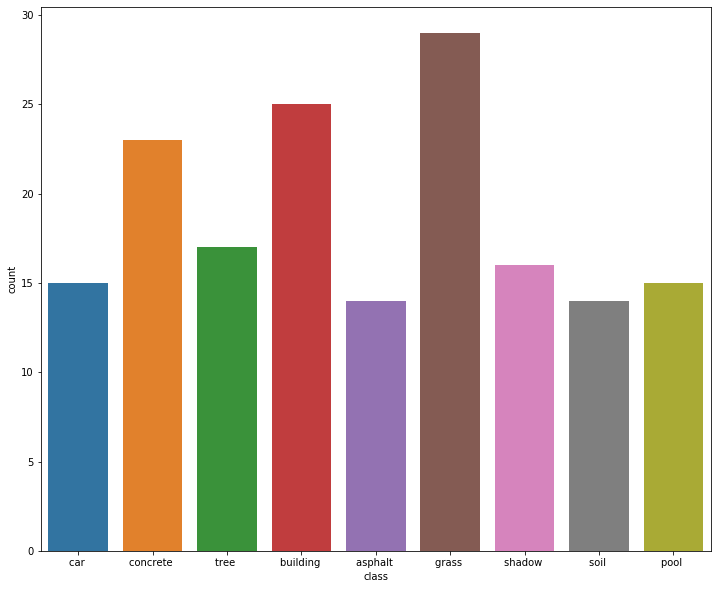

In [10]:
#checking the distribution of the class feature
plt.figure(figsize = (12,10))
ax = sns.countplot(x = 'class', data = train_data)

In [11]:
train_data['class'].value_counts()

grass        29
building     25
concrete     23
tree         17
shadow       16
car          15
pool         15
soil         14
asphalt      14
Name: class, dtype: int64

In [12]:
test_data['class'].value_counts()

building     97
concrete     93
tree         89
grass        83
asphalt      45
shadow       45
car          21
soil         20
pool         14
Name: class, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
x_train = scaler.fit_transform(train_data.drop('class',axis=1))
y_train = train_data['class']
x_test = scaler.transform(test_data.drop('class',axis=1))
y_test = test_data['class']

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [51]:
svc_param_selection(x_train,y_train,10)

D:\Users\sayed\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1, 'gamma': 0.01}

In [17]:
from sklearn.model_selection import cross_val_score
model = SVC(gamma=0.01,kernel = 'rbf', C =1)
accuracy = cross_val_score(model, x_train, y_train, scoring='accuracy', cv = 10)

In [18]:
np.mean(accuracy)

0.8166971916971917

In [19]:
model.fit(x_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
y_prediction = model.predict(x_test)

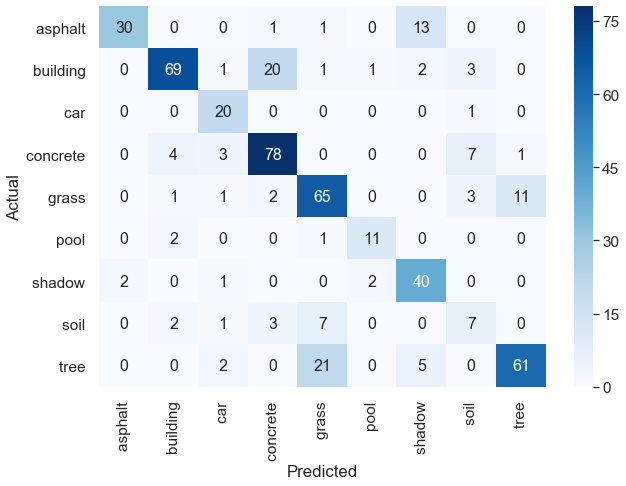

In [21]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_prediction)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

    asphalt        0.94      0.67      0.78        45
   building        0.88      0.71      0.79        97
        car        0.69      0.95      0.80        21
   concrete        0.75      0.84      0.79        93
      grass        0.68      0.78      0.73        83
       pool        0.79      0.79      0.79        14
     shadow        0.67      0.89      0.76        45
       soil        0.33      0.35      0.34        20
       tree        0.84      0.69      0.75        89

    accuracy                           0.75       507
   macro avg       0.73      0.74      0.73       507
weighted avg       0.77      0.75      0.75       507



## Random Forest Classifier

In [69]:
# use a full grid over all parameters
from sklearn.ensemble import RandomForestClassifier
param_grid = {"n_estimators" : [20,30,50,60,80,100,120],
              "max_depth": [3, 4,5],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
clf = RandomForestClassifier()
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, iid=False)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [24]:
model = RandomForestClassifier(bootstrap=True,criterion='gini',max_depth=5,max_features=3,n_estimators= 100,min_samples_split= 2)


In [25]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
y_prediction = model.predict(x_test)

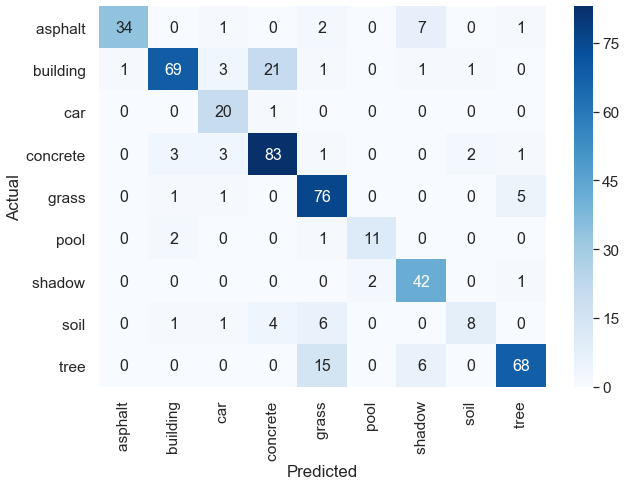

In [27]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_prediction)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

    asphalt        0.97      0.76      0.85        45
   building        0.91      0.71      0.80        97
        car        0.69      0.95      0.80        21
   concrete        0.76      0.89      0.82        93
      grass        0.75      0.92      0.82        83
       pool        0.85      0.79      0.81        14
     shadow        0.75      0.93      0.83        45
       soil        0.73      0.40      0.52        20
       tree        0.89      0.76      0.82        89

    accuracy                           0.81       507
   macro avg       0.81      0.79      0.79       507
weighted avg       0.83      0.81      0.81       507



## ADA BOOST

In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [81]:
param_grid = {"max_depth": [3, 4,5,10,12,15,20,25,30],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10,12,14],
              "criterion": ["gini", "entropy"]}

# run grid search
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10, iid=False)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 25,
 'max_features': 10,
 'min_samples_split': 14}

In [30]:
decision_model = DecisionTreeClassifier(criterion= 'entropy',random_state=0, max_depth= 25, max_features = 10,min_samples_split=14)

In [31]:
estimator_list = [decision_model, model]

In [32]:
param_grid = {'base_estimator' :estimator_list,
              'n_estimators' :[50,80,100,120,140,160,180,200],
              'learning_rate' : [1,0.1,0.01],
             'algorithm' : ['SAMME','SAMME.R']}
ada_model = AdaBoostClassifier()
grid_search = GridSearchCV(ada_model, param_grid=param_grid, cv=10, iid=False)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'algorithm': 'SAMME.R',
 'base_estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=5, max_features=3, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 'learning_rate': 0.1,
 'n_estimators': 160}

In [33]:

clf = AdaBoostClassifier(model,n_estimators=160, random_state=0,learning_rate=0.1)

In [34]:
clf.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=3,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=100,
                                

In [35]:
y_prediction = clf.predict(x_test)

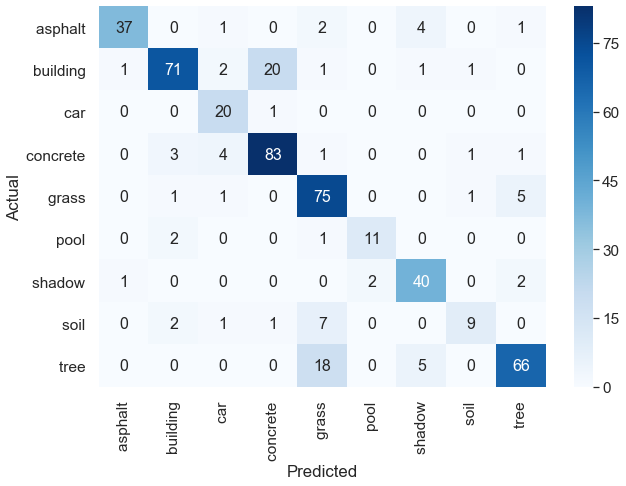

In [36]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_prediction)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

    asphalt        0.95      0.82      0.88        45
   building        0.90      0.73      0.81        97
        car        0.69      0.95      0.80        21
   concrete        0.79      0.89      0.84        93
      grass        0.71      0.90      0.80        83
       pool        0.85      0.79      0.81        14
     shadow        0.80      0.89      0.84        45
       soil        0.75      0.45      0.56        20
       tree        0.88      0.74      0.80        89

    accuracy                           0.81       507
   macro avg       0.81      0.80      0.79       507
weighted avg       0.83      0.81      0.81       507



## Try PCA and Run the same algorithms again

In [38]:
from sklearn.decomposition import PCA
pca= PCA(n_components = None)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_

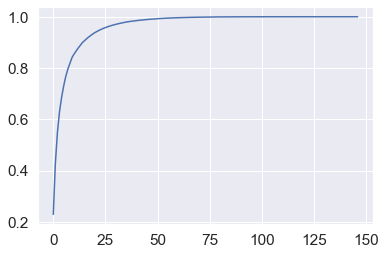

In [39]:
sns.set_style("darkgrid")
plt.plot(np.cumsum(explained_variance))
plt.show()

In [40]:
pca= PCA(n_components = 0.95)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [41]:
(x_train.shape,x_test.shape)

((168, 24), (507, 24))

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [43]:
svc_param_selection(x_train,y_train,10)

D:\Users\sayed\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 10, 'gamma': 0.001}

In [44]:
from sklearn.model_selection import cross_val_score
model = SVC(gamma=0.001,kernel = 'rbf', C =10)
accuracy = cross_val_score(model, x_train, y_train, scoring='accuracy', cv = 10)

In [45]:
np.mean(accuracy)

0.8250366300366301

In [46]:
model.fit(x_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
y_prediction = model.predict(x_test)

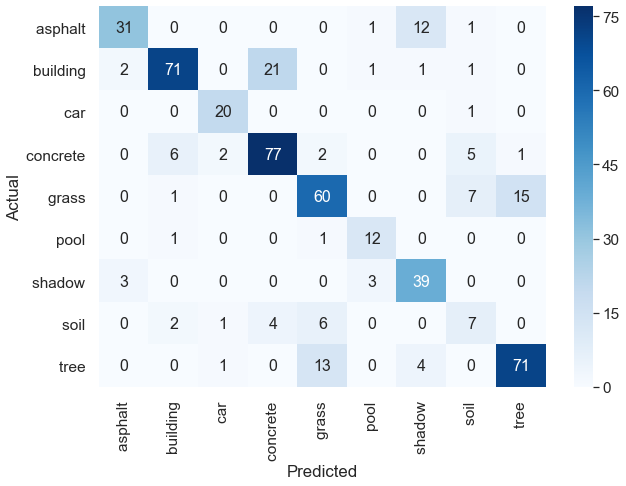

In [48]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_prediction)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

    asphalt        0.86      0.69      0.77        45
   building        0.88      0.73      0.80        97
        car        0.83      0.95      0.89        21
   concrete        0.75      0.83      0.79        93
      grass        0.73      0.72      0.73        83
       pool        0.71      0.86      0.77        14
     shadow        0.70      0.87      0.77        45
       soil        0.32      0.35      0.33        20
       tree        0.82      0.80      0.81        89

    accuracy                           0.77       507
   macro avg       0.73      0.76      0.74       507
weighted avg       0.77      0.77      0.77       507



## Random Forest classifier

In [29]:
# use a full grid over all parameters
from sklearn.ensemble import RandomForestClassifier
param_grid = {"n_estimators" : [20,30,50,60,80,100,120,140,160],
              "max_depth": [3, 4,5,6,8],
              "max_features": [1, 3, 10,12,14],
              "min_samples_split": [2, 3, 10,12,7],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
clf = RandomForestClassifier()
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, iid=False)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 14,
 'min_samples_split': 7,
 'n_estimators': 80}

In [30]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 14,
 'min_samples_split': 7,
 'n_estimators': 80}

In [50]:
model = RandomForestClassifier(bootstrap=True,criterion='entropy',max_depth=8,max_features=14,n_estimators= 80,min_samples_split= 7)


In [51]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=14, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
y_prediction = model.predict(x_test)

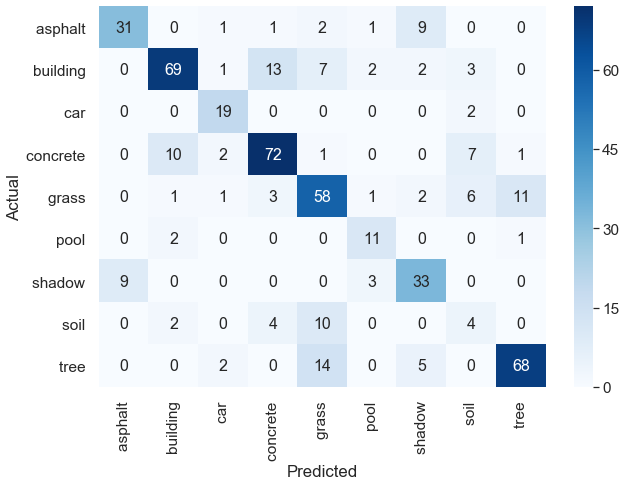

In [53]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_prediction)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

    asphalt        0.78      0.69      0.73        45
   building        0.82      0.71      0.76        97
        car        0.73      0.90      0.81        21
   concrete        0.77      0.77      0.77        93
      grass        0.63      0.70      0.66        83
       pool        0.61      0.79      0.69        14
     shadow        0.65      0.73      0.69        45
       soil        0.18      0.20      0.19        20
       tree        0.84      0.76      0.80        89

    accuracy                           0.72       507
   macro avg       0.67      0.70      0.68       507
weighted avg       0.73      0.72      0.72       507



## ADA BOOST

In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [37]:
param_grid = {"max_depth": [3, 4,5,10,12,15,20,25,30],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10,12,14],
              "criterion": ["gini", "entropy"]}

# run grid search
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10, iid=False)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 10,
 'min_samples_split': 14}

In [55]:
decision_model = DecisionTreeClassifier(random_state=0, max_depth= 20, max_features = 10,min_samples_split=14)
estimator_list = [decision_model, model]

In [57]:
param_grid = {'base_estimator' :estimator_list,
              'n_estimators' :[50,80,100,120,140,160,180,200],
              'learning_rate' : [1,0.1,0.01],
             'algorithm' : ['SAMME','SAMME.R']}
ada_model = AdaBoostClassifier()
grid_search = GridSearchCV(ada_model, param_grid=param_grid, cv=10, iid=False)
grid_search.fit(x_train, y_train)
grid_search.best_params_

KeyboardInterrupt: 

In [58]:
clf = AdaBoostClassifier(decision_model,n_estimators=140, random_state=0,learning_rate=1)

In [59]:
clf.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=20,
                                                         max_features=10,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=14,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=0,
                                

In [60]:
y_prediction = clf.predict(x_test)

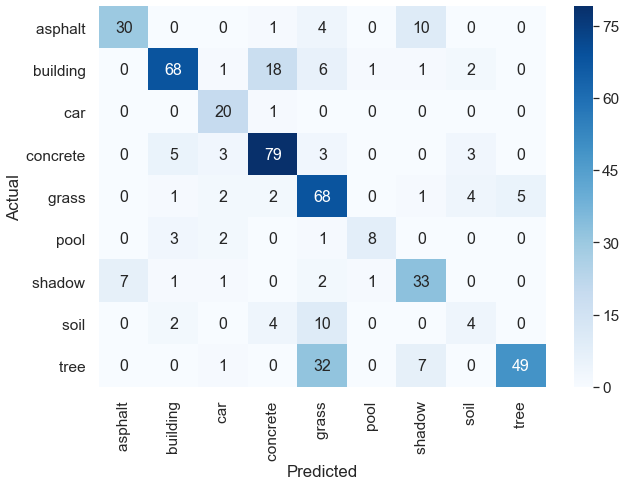

In [61]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_prediction)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

    asphalt        0.81      0.67      0.73        45
   building        0.85      0.70      0.77        97
        car        0.67      0.95      0.78        21
   concrete        0.75      0.85      0.80        93
      grass        0.54      0.82      0.65        83
       pool        0.80      0.57      0.67        14
     shadow        0.63      0.73      0.68        45
       soil        0.31      0.20      0.24        20
       tree        0.91      0.55      0.69        89

    accuracy                           0.71       507
   macro avg       0.70      0.67      0.67       507
weighted avg       0.74      0.71      0.71       507



## Using Kernel PCA

In [63]:
x_train = scaler.fit_transform(train_data.drop('class',axis=1))
y_train = train_data['class']
x_test = scaler.transform(test_data.drop('class',axis=1))
y_test = test_data['class']

In [64]:
kpca = KernelPCA(n_components=27, kernel='linear')
x_train = kpca.fit_transform(x_train)
x_test = kpca.transform(x_test)

In [65]:
(x_train.shape,x_test.shape)

((168, 27), (507, 27))

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [67]:
svc_param_selection(x_train,y_train,10)

D:\Users\sayed\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.01, 'gamma': 0.001}

In [68]:
from sklearn.model_selection import cross_val_score
model = SVC(gamma=0.001,kernel = 'linear', C =0.01)
accuracy = cross_val_score(model, x_train, y_train, scoring='accuracy', cv = 10)

In [69]:
np.mean(accuracy)

0.8254395604395605

In [70]:
model.fit(x_train,y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [74]:
y_prediction = model.predict(x_test)

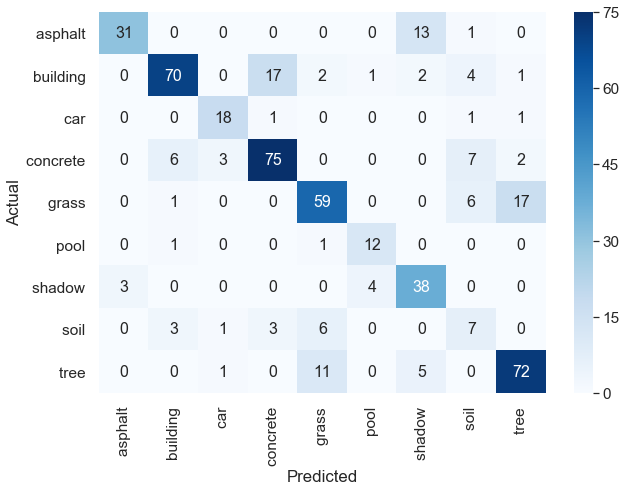

In [75]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_prediction)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

    asphalt        0.91      0.69      0.78        45
   building        0.86      0.72      0.79        97
        car        0.78      0.86      0.82        21
   concrete        0.78      0.81      0.79        93
      grass        0.75      0.71      0.73        83
       pool        0.71      0.86      0.77        14
     shadow        0.66      0.84      0.74        45
       soil        0.27      0.35      0.30        20
       tree        0.77      0.81      0.79        89

    accuracy                           0.75       507
   macro avg       0.72      0.74      0.72       507
weighted avg       0.77      0.75      0.76       507



## Random Forest classifier

In [64]:
# use a full grid over all parameters
from sklearn.ensemble import RandomForestClassifier
param_grid = {"n_estimators" : [20,30,50,60,80,100,120],
              "max_depth": [3, 4,5],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
clf = RandomForestClassifier()
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, iid=False)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 10,
 'min_samples_split': 2,
 'n_estimators': 80}

In [65]:
model = RandomForestClassifier(bootstrap=True,criterion='entropy',max_depth=5,max_features=10,n_estimators= 80,min_samples_split= 2)


In [66]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
y_prediction = model.predict(x_test)

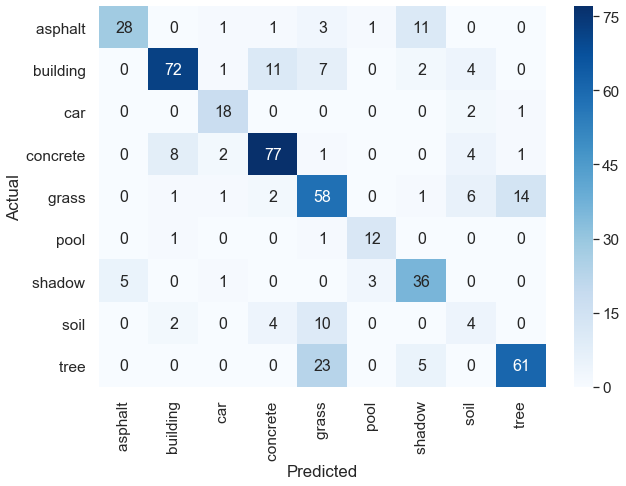

In [68]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_prediction)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

    asphalt        0.85      0.62      0.72        45
   building        0.86      0.74      0.80        97
        car        0.75      0.86      0.80        21
   concrete        0.81      0.83      0.82        93
      grass        0.56      0.70      0.62        83
       pool        0.75      0.86      0.80        14
     shadow        0.65      0.80      0.72        45
       soil        0.20      0.20      0.20        20
       tree        0.79      0.69      0.73        89

    accuracy                           0.72       507
   macro avg       0.69      0.70      0.69       507
weighted avg       0.74      0.72      0.72       507



In [70]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [71]:
param_grid = {"max_depth": [3, 4,5,10,12,15,20,25,30],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10,12,14],
              "criterion": ["gini", "entropy"]}

# run grid search
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10, iid=False)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 10,
 'min_samples_split': 14}

In [72]:
decision_model = DecisionTreeClassifier(random_state=0, max_depth= 30, max_features = 10,min_samples_split=14,criterion='gini')

In [73]:
estimator_list = [decision_model, model]

In [75]:
param_grid = {'base_estimator' :estimator_list,
              'n_estimators' :[50,80,100,120,140,160,180,200],
              'learning_rate' : [1,0.1,0.01],
             'algorithm' : ['SAMME','SAMME.R']}
ada_model = AdaBoostClassifier()
grid_search = GridSearchCV(ada_model, param_grid=param_grid, cv=10, iid=False)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'algorithm': 'SAMME',
 'base_estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                        max_depth=5, max_features=10, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=80,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 'learning_rate': 0.1,
 'n_estimators': 100}

In [76]:

clf = AdaBoostClassifier(model,algorithm= 'SAMME',n_estimators=100, random_state=0,learning_rate=0.1)

In [77]:
clf.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=5,
                                                         max_features=10,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=80,
                               

In [78]:
y_prediction = clf.predict(x_test)

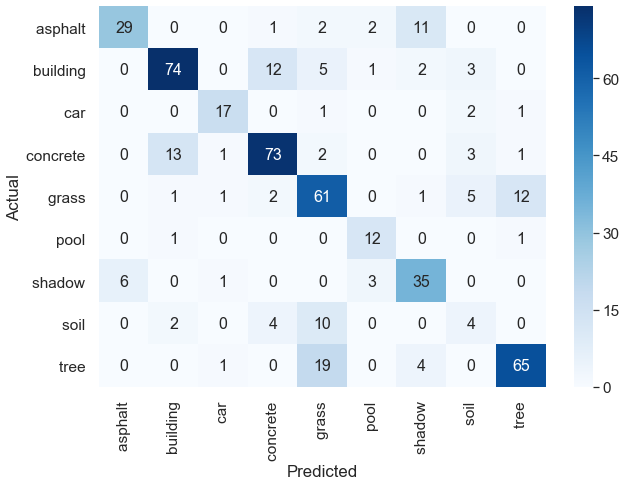

In [79]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_prediction)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

    asphalt        0.83      0.64      0.73        45
   building        0.81      0.76      0.79        97
        car        0.81      0.81      0.81        21
   concrete        0.79      0.78      0.79        93
      grass        0.61      0.73      0.67        83
       pool        0.67      0.86      0.75        14
     shadow        0.66      0.78      0.71        45
       soil        0.24      0.20      0.22        20
       tree        0.81      0.73      0.77        89

    accuracy                           0.73       507
   macro avg       0.69      0.70      0.69       507
weighted avg       0.74      0.73      0.73       507



## since we can see that our data has different ranges for different features, we need to standardize the data so that so features don't have more impact on our model than the rest


In [139]:
#removing correlated features

#Create correlation matrix
cor_mat = train_data.drop('class', axis=1).corr().abs()

# Select upper triangle of correlation matrix
upper_triang = cor_mat.where(np.triu(np.ones(cor_mat.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper_triang.columns if any(upper_triang[column] > 0.90)]

In [140]:
x_train = train_data.drop(train_data[to_drop], axis=1)
x_test = test_data.drop(train_data[to_drop], axis=1)

In [141]:
(x_train.shape,x_test.shape)

((168, 71), (507, 71))

In [142]:
x_train = scaler.fit_transform(x_train.drop('class',axis=1))
y_train = train_data['class']
x_test = scaler.transform(x_test.drop('class',axis=1))
y_test = test_data['class']

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [109]:
svc_param_selection(x_train,y_train,10)

D:\Users\sayed\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 10, 'gamma': 0.01}

In [110]:
from sklearn.model_selection import cross_val_score
model = SVC(gamma=0.01,kernel = 'rbf', C =10)
accuracy = cross_val_score(model, x_train, y_train, scoring='accuracy', cv = 10)

In [111]:
np.mean(accuracy)

0.7616422466422467

In [112]:
model.fit(x_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [113]:
y_prediction = model.predict(x_test)

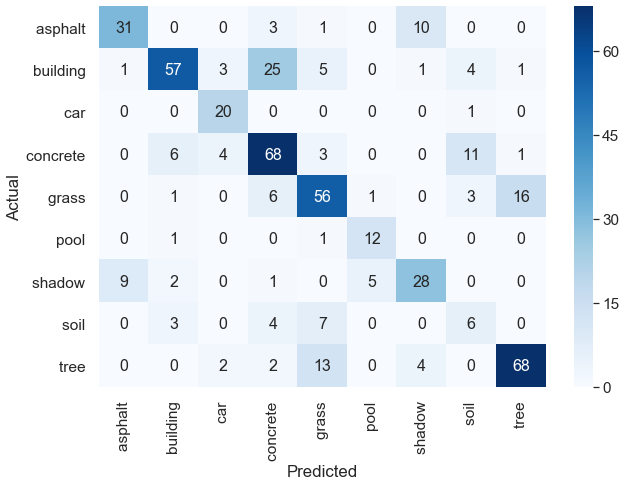

In [114]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_prediction)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

    asphalt        0.76      0.69      0.72        45
   building        0.81      0.59      0.68        97
        car        0.69      0.95      0.80        21
   concrete        0.62      0.73      0.67        93
      grass        0.65      0.67      0.66        83
       pool        0.67      0.86      0.75        14
     shadow        0.65      0.62      0.64        45
       soil        0.24      0.30      0.27        20
       tree        0.79      0.76      0.78        89

    accuracy                           0.68       507
   macro avg       0.65      0.69      0.66       507
weighted avg       0.70      0.68      0.68       507



## Random Forest Classifier


In [117]:
# use a full grid over all parameters
from sklearn.ensemble import RandomForestClassifier
param_grid = {"n_estimators" : [20,30,50,60,80,100,120],
              "max_depth": [3, 4,5],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
clf = RandomForestClassifier()
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, iid=False)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 10,
 'min_samples_split': 3,
 'n_estimators': 120}

In [118]:
model = RandomForestClassifier(bootstrap=True,criterion='gini',max_depth=5,max_features=10,n_estimators= 120,min_samples_split= 3)


In [119]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [120]:
y_prediction = model.predict(x_test)

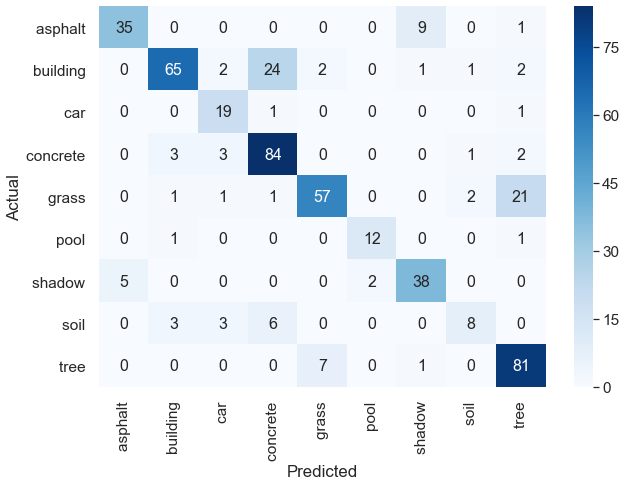

In [121]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_prediction)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

    asphalt        0.88      0.78      0.82        45
   building        0.89      0.67      0.76        97
        car        0.68      0.90      0.78        21
   concrete        0.72      0.90      0.80        93
      grass        0.86      0.69      0.77        83
       pool        0.86      0.86      0.86        14
     shadow        0.78      0.84      0.81        45
       soil        0.67      0.40      0.50        20
       tree        0.74      0.91      0.82        89

    accuracy                           0.79       507
   macro avg       0.79      0.77      0.77       507
weighted avg       0.80      0.79      0.78       507



## ADA BOOST

In [124]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [125]:
param_grid = {"max_depth": [3, 4,5,10,12,15,20,25,30],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10,12,14],
              "criterion": ["gini", "entropy"]}

# run grid search
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10, iid=False)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 10,
 'min_samples_split': 3}

In [126]:
decision_model = DecisionTreeClassifier(criterion= 'entropy',random_state=0, max_depth= 30, max_features = 10,min_samples_split=3)

In [128]:
param_grid = {'n_estimators' :[50,80,100,120,140,160,180,200],
              'learning_rate' : [1,0.1,0.01],
             'algorithm' : ['SAMME','SAMME.R']}
ada_model = AdaBoostClassifier(base_estimator  = decision_model)
grid_search = GridSearchCV(ada_model, param_grid=param_grid, cv=10, iid=False)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 120}

In [129]:

clf = AdaBoostClassifier(decision_model,n_estimators=120,learning_rate=1,algorithm= 'SAMME')

In [130]:
clf.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=30,
                                                         max_features=10,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=3,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=0,
                                

In [131]:
y_prediction = clf.predict(x_test)

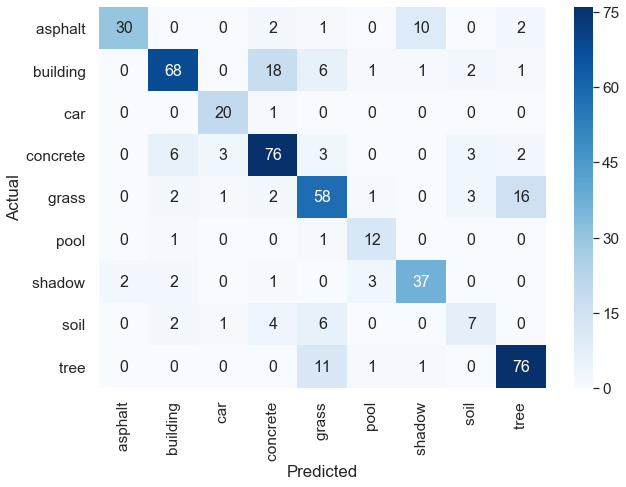

In [132]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_prediction)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [133]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

    asphalt        0.94      0.67      0.78        45
   building        0.84      0.70      0.76        97
        car        0.80      0.95      0.87        21
   concrete        0.73      0.82      0.77        93
      grass        0.67      0.70      0.69        83
       pool        0.67      0.86      0.75        14
     shadow        0.76      0.82      0.79        45
       soil        0.47      0.35      0.40        20
       tree        0.78      0.85      0.82        89

    accuracy                           0.76       507
   macro avg       0.74      0.75      0.74       507
weighted avg       0.76      0.76      0.76       507



## Trying PCA 

In [143]:
(x_train.shape,x_test.shape)

((168, 70), (507, 70))

In [144]:
from sklearn.decomposition import PCA
pca= PCA(n_components = None)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_

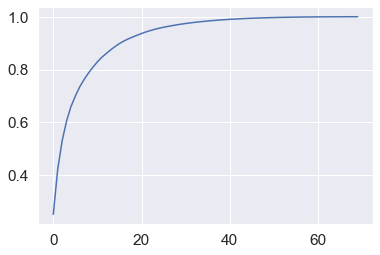

In [145]:
sns.set_style("darkgrid")
plt.plot(np.cumsum(explained_variance))
plt.show()

In [146]:
pca= PCA(n_components = 0.95)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [147]:
(x_train.shape,x_test.shape)

((168, 24), (507, 24))

In [148]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [149]:
svc_param_selection(x_train,y_train,10)

D:\Users\sayed\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 10, 'gamma': 0.001}

In [150]:
from sklearn.model_selection import cross_val_score
model = SVC(gamma=0.001,kernel = 'rbf', C =10)
accuracy = cross_val_score(model, x_train, y_train, scoring='accuracy', cv = 10)

In [151]:
np.mean(accuracy)

0.7457753357753358

In [ ]:
# use a full grid over all parameters
from sklearn.ensemble import RandomForestClassifier
param_grid = {"n_estimators" : [20,30,50,60,80,100,120,140,160],
              "max_depth": [3, 4,5,6,8],
              "max_features": [1, 3, 10,12,14],
              "min_samples_split": [2, 3, 10,12,7],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
clf = RandomForestClassifier()
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, iid=False)
grid_search.fit(x_train, y_train)
grid_search.best_params_

In [ ]:
model = RandomForestClassifier(bootstrap=True,criterion='entropy',max_depth=8,max_features=14,n_estimators= 80,min_samples_split= 7)


In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_prediction = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_prediction)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

In [79]:
# X = new_x_train.drop('class',axis=1)
# Y = new_x_train['class']
X = train_data.drop('class',axis=1)
Y = train_data['class']

In [77]:
(X.shape, Y.shape)

((168, 147), (168,))

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X)
x_test = scaler.transform(test_data.drop(to_drop+['class'],axis=1))
y_test = test_data['class']
# x_test = scaler.transform(test_data.drop('class',axis=1))
# y_test = test_data['class']

ValueError: operands could not be broadcast together with shapes (507,32) (147,) (507,32) 

In [59]:
(X.shape, Y.shape, x_train.shape, x_test.shape, y_test.shape)

((168, 147), (168,), (168, 147), (507, 147), (507,))

In [60]:
from sklearn.svm import SVC
model = SVC(gamma='auto')
model.fit(x_train,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
y_prediction = model.predict(x_test)

In [62]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_prediction)
cnf_matrix

array([[31,  0,  1,  1,  0,  0, 12,  0,  0],
       [ 0, 71,  3, 16,  1,  1,  2,  3,  0],
       [ 0,  0, 20,  0,  0,  0,  0,  1,  0],
       [ 0,  5,  3, 77,  0,  0,  0,  7,  1],
       [ 0,  1,  1,  3, 63,  0,  0,  3, 12],
       [ 0,  2,  0,  0,  1, 11,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  2, 41,  0,  0],
       [ 0,  2,  1,  3,  7,  0,  0,  7,  0],
       [ 0,  0,  1,  1, 18,  0,  5,  0, 64]], dtype=int64)

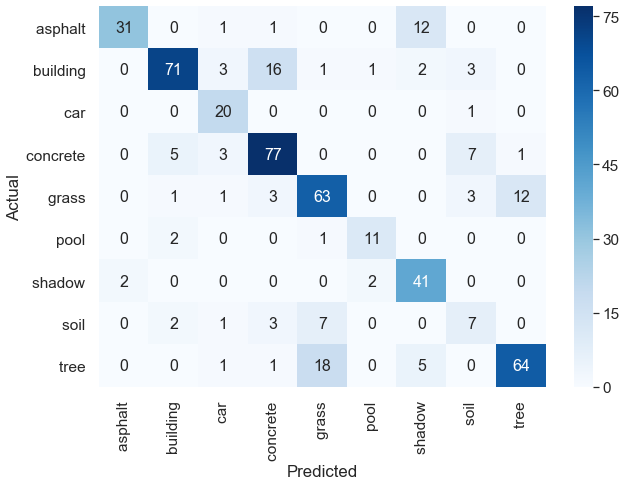

In [63]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_prediction)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

    asphalt        0.94      0.69      0.79        45
   building        0.88      0.73      0.80        97
        car        0.67      0.95      0.78        21
   concrete        0.76      0.83      0.79        93
      grass        0.70      0.76      0.73        83
       pool        0.79      0.79      0.79        14
     shadow        0.68      0.91      0.78        45
       soil        0.33      0.35      0.34        20
       tree        0.83      0.72      0.77        89

    accuracy                           0.76       507
   macro avg       0.73      0.75      0.73       507
weighted avg       0.77      0.76      0.76       507



In [65]:
# trying pca
from sklearn.decomposition import PCA

# Apply kernal PCA with radius basis function (RBF) kernel
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(x_train)
xt_pca = pca.transform(x_test)

In [66]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier


In [67]:
# Create adaboost-decision tree classifer object
clf = AdaBoostClassifier(n_estimators=50,learning_rate=1,random_state=1)

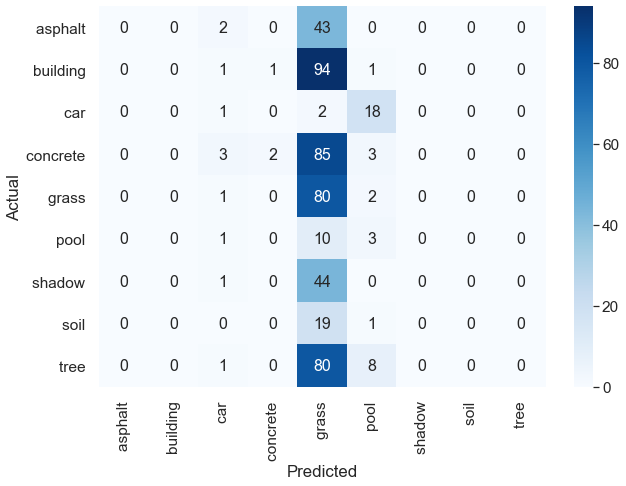

In [68]:
clf.fit(X_pca,Y)
y_prediction = clf.predict(xt_pca)
cnf_matrix = confusion_matrix(y_test, y_prediction)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_



In [83]:
svc_param_selection(X_pca, Y, 20)

D:\Users\sayed\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 14 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)
D:\Users\sayed\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 10, 'gamma': 0.001}

In [84]:
model = SVC(gamma=0.001,kernel = 'rbf', C =10)
model.fit(X_pca,Y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

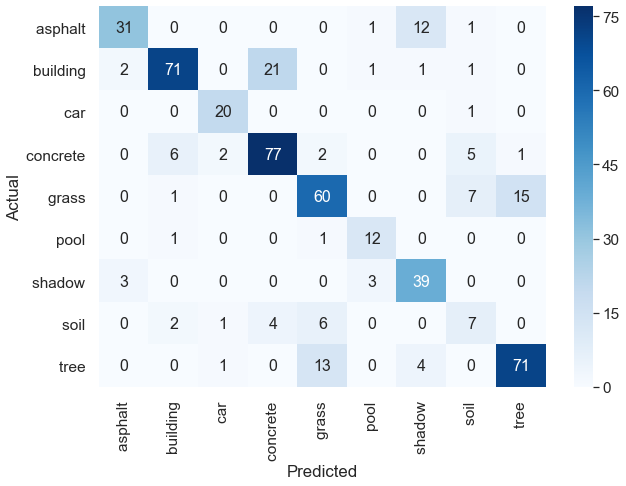

In [85]:
y_prediction = model.predict(xt_pca)
cnf_matrix = confusion_matrix(y_test, y_prediction)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

    asphalt        0.86      0.69      0.77        45
   building        0.88      0.73      0.80        97
        car        0.83      0.95      0.89        21
   concrete        0.75      0.83      0.79        93
      grass        0.73      0.72      0.73        83
       pool        0.71      0.86      0.77        14
     shadow        0.70      0.87      0.77        45
       soil        0.32      0.35      0.33        20
       tree        0.82      0.80      0.81        89

    accuracy                           0.77       507
   macro avg       0.73      0.76      0.74       507
weighted avg       0.77      0.77      0.77       507



In [74]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1]
 }

pre_gs_inst = RandomizedSearchCV(AdaBoostClassifier(),
 param_distributions = param_dist,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

pre_gs_inst.fit(x_train, Y)

D:\Users\sayed\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'n_estimators': [50, 100]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

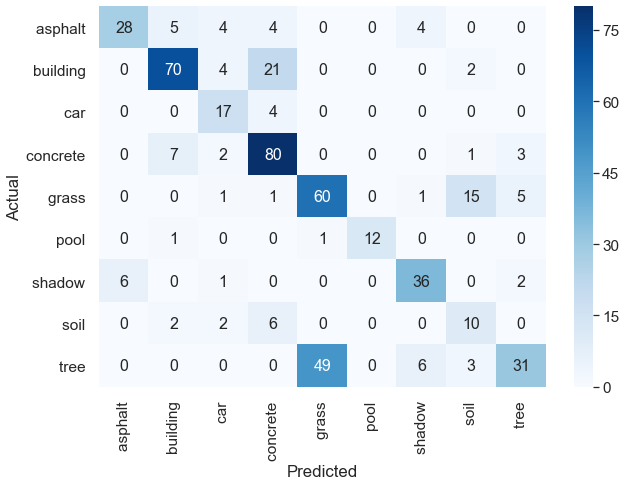

In [75]:
y_prediction = pre_gs_inst.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_prediction)
df_cm = pd.DataFrame(cnf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [52]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [55]:
svc_param_selection(x_train, Y, 10)

D:\Users\sayed\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 10, 'gamma': 0.01}